# Kalorimetrie Laborversuch

Author: Keanu Engel

Datum: 23.11.2023

Gruppe: 12

## Forschungsfrage

Welche spezifischen Wärmekapazitäten haben die einzelnen Materialien? Sind diese sehr unterschiedlich? Welches Material hat die höchste Wärmekapazität? Können die Wärmekapazitäten der Materialien, die bereits in der Literatur festgehaltenen sind, durch dieses Experiment bestätigt werden?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Nutzen Sie hier Ihr eigenes Bild.

In Bild 1 ist der ganze Versuchsaufbau zu sehen. Dieser besteht aus einem Tauchsieder, einem Magetrührer, der das Wasser in dem Kalorimeter durchrührt und einem Sous-Vide-Garer der das Heißwasserbad erhitzt. In dem ersten Schritt des Experiments wird die Kaloriemeterkonstante bestimmt, wie in Bild 2 zu sehen ist, indem mit dem Tauchsieder das Wasser im Kalorimeter erhitzt wird, dieser wird nach 3 Minuten abgeschaltet. Während des ganzen Prozesses wird mittels der 3 Temperatursensoren in dem Kaloriemeter die Temperatur gemessen. Die Messung wird 30 Sekunden vor Anschalten des Tauchsieders gestartet und 30 Sekunden nach Abschalten beendet.
Im zweiten Schritt des Experiments werden die spezifischen Wärmekapazitäten der drei Proben bestimmt, wie in Bild 3 gezeigt. Die drei Proben bestehen aus Messing, Aluminium und Kunststoff. Hierbei werden die Proben in des Heißwasserbad gestellt und dieses wird anschließend auf 80 °C erhitzt. Die Messung wird gestartet und 30 Sekunden laufen lassen und anschließend wird jede Probe nacheinander in das Kalorimeter gelegt. Es wird hierbei solange gemessen, bis die Temperaturwerte im Kalorimeter relativ konstant sind.


<img src="figures/Kaloriemetrie_Pruefstand.jpg" width="800">
<img src="figures/Kaloriemetrie_Pruefstand_Kalorimeterkonstante.jpg" width="800">
<img src="figures/Kaloriemetrie_Pruefstand_Versuch.jpg" width="800">


## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import h5py as h5
import importlib

from functions import m_json
from functions import utility

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Kalorimeterkonstante
Hinweis: Sie können die Funktion *get_json_entry* nutzen um auf Metadaten zuzugreifen. 

Für die Messdatenauswertung steht Ihnen bereits ein Modul utility.py zur Verfügung. Ergänzen sie die Funktionen im Modul zwischen TODO und DONE. Sie finden weitere Hinweise im jeweiligen Bereich TODO->DONE. 


#### (i) Messdaten einlesen
Lesen Sie die Messdaten in ihr Notebook ein.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_const = '/home/jovyan/work/calorimetry_laboratory/data/kalorimeterkonstante/kalorimeterkonstante.h5'

# DONE #

In [3]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_const,"RawData")
#print(data_dict)

# DONE #

In [4]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.
# List the index of all calorimeter sensors (index_calorimeter) and
# the environment sensor (index_environment).
# You can use this variables to easily get access to the correct measurement data later.

index_calorimeter = [0, 1, 2]
index_environment = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

Die Mittelwerte und Standardabweichungen der Messungen werden in der nächsten Sektion geplottet.

Nachdem die Mittelwerte und Standardabweichungen berechnet wurden, können Daten jeder Wärmequelle jeweils in einem numpy.ndarray gespeichert werden.

In [5]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of the calorimeter sensors and the environment sensor.
# You can use the indices from above.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation([data_dict['temperature'][index_calorimeter[0]], data_dict['temperature'][index_calorimeter[1]], data_dict['temperature'][index_calorimeter[2]]])
mean_std_environment = utility.cal_mean_and_standard_deviation([data_dict['temperature'][index_environment[0]]])
#print(mean_std_calorimeter)
#print(mean_std_environment)

# DONE #

#### (iii) Daten ploten

Im Kalorimeter befinden sich mehrere Sensoren, deren Mittelwerte sowie Standardabweichungen der Messung an jeden Zeitpunkt bestimmt wurden. Die Messdaten bzw. ihre Mittelwerte sollen in einem Plot eingetragen werden. Die Standardabweichungen der Sensoren sind als Errorbar im Plot zu sehen.

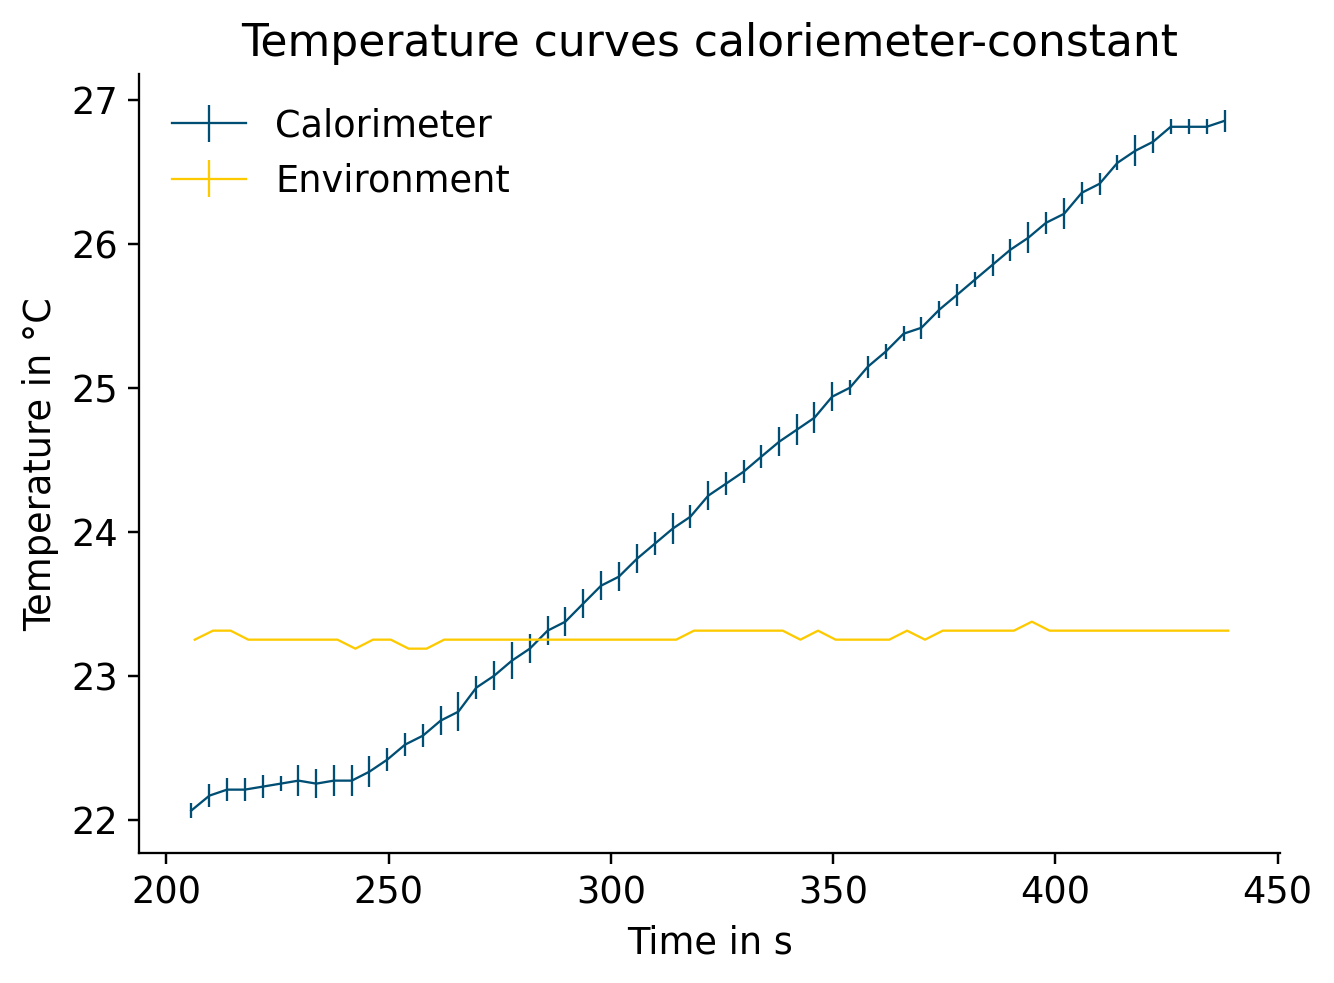

In [7]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting

utility.plot_temp_over_time([mean_std_calorimeter, mean_std_environment], data_dict['time'], ['Calorimeter', 'Environment'], 'Time', 'Temperature')

plt.title('Temperature curves caloriemeter-constant');

# DONE #

#### (iv) Metadaten auslesen

Die notwendigen Daten bzw. Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [8]:
# Heat capacity of Water has been given
water_heat_capa = 4.18

# TODO: Read mass of the water from the metadata of the experiment.

water_mass = None
path_to_mass = '/home/jovyan/work/calorimetry_laboratory/data/kalorimeterkonstante'
mass_water = m_json.get_json_entry(path_to_mass, '1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753', ['calorimeter', 'medium', 'mass', 'value'])

print(mass_water)

# DONE #

400


In [9]:
# TODO: Reading heater related data from hdf5 file, please use the same datafile_path_const variable for the HDF5 path.
# Hint: Note whether the data is stored as an array or a scalar in the hdf5 dataset.

current = None
heat_time = None
voltage = None

with h5.File(datafile_path_const) as data:
    current = np.array(data["RawData"]["1ee21744-0355-6023-94b4-d5c041dd32cd"]["current_A"])
    heat_time = np.array(data["RawData"]["1ee21744-0355-6023-94b4-d5c041dd32cd"]["heat_time_s"])
    voltage = np.array(data["RawData"]["1ee21744-0355-6023-94b4-d5c041dd32cd"]["voltage_V"])
    
print(current)
print(heat_time)
print(voltage)
# data is stored as an array
type(voltage)

# DONE #

4.0
180.0
12.4


numpy.ndarray

#### (v) Anfangs- und Endwert der Temperatur
Die Anfangs- und Endwert der Temperatur im Kloriemeter sind notwendig, um die Wärmekapazität zu bestimmen. 

Eine Möglichkeit wäre, durch das Maxium bzw. Minium und einen Schwellenwert ist ein Teil der Daten zu entnehmen. 

Daraus sind Mittelwerte zu berechnen. Die entsprechenden Mittelwerte können als Anfangs- und Endtemperatur verwendet werden.

In [10]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_end, temperature_start = utility.get_start_end_temperature(data_dict['temperature']) 
print(temperature_end)
print(temperature_start)

# DONE #

26.816964285714285
22.12890625


#### (vi) Kalorimeterkonstante bestimmen
$$
C = \frac{UI\Delta t}{(T_2 - T_1)}
$$

In [11]:
# TODO: Calculate heat capacity of the calorimeter

calorimeter_const = (current*voltage*heat_time)/(temperature_end-temperature_start)

# DONE #

#### (Vii) Ergebnis

In [12]:
calorimeter_const

1904.4132841328417

### spezifische Wärmekapazität: erste Probe


#### (i) Messdaten einlesen

In [13]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob1 = '/home/jovyan/work/calorimetry_laboratory/data/spez_wk_messing/spez_wk_messing.h5'

# DONE #

In [14]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob1,"RawData")
#print(data_dict)

# DONE #

In [15]:


# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0, 1, 2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [16]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation([data_dict['temperature'][index_calorimeter[0]], data_dict['temperature'][index_calorimeter[1]], data_dict['temperature'][index_calorimeter[2]]])
mean_std_environment = utility.cal_mean_and_standard_deviation([data_dict['temperature'][index_env[0]]])
mean_std_heater = utility.cal_mean_and_standard_deviation([data_dict['temperature'][index_bath[0]]])


# DONE #

#### (iii) Daten ploten

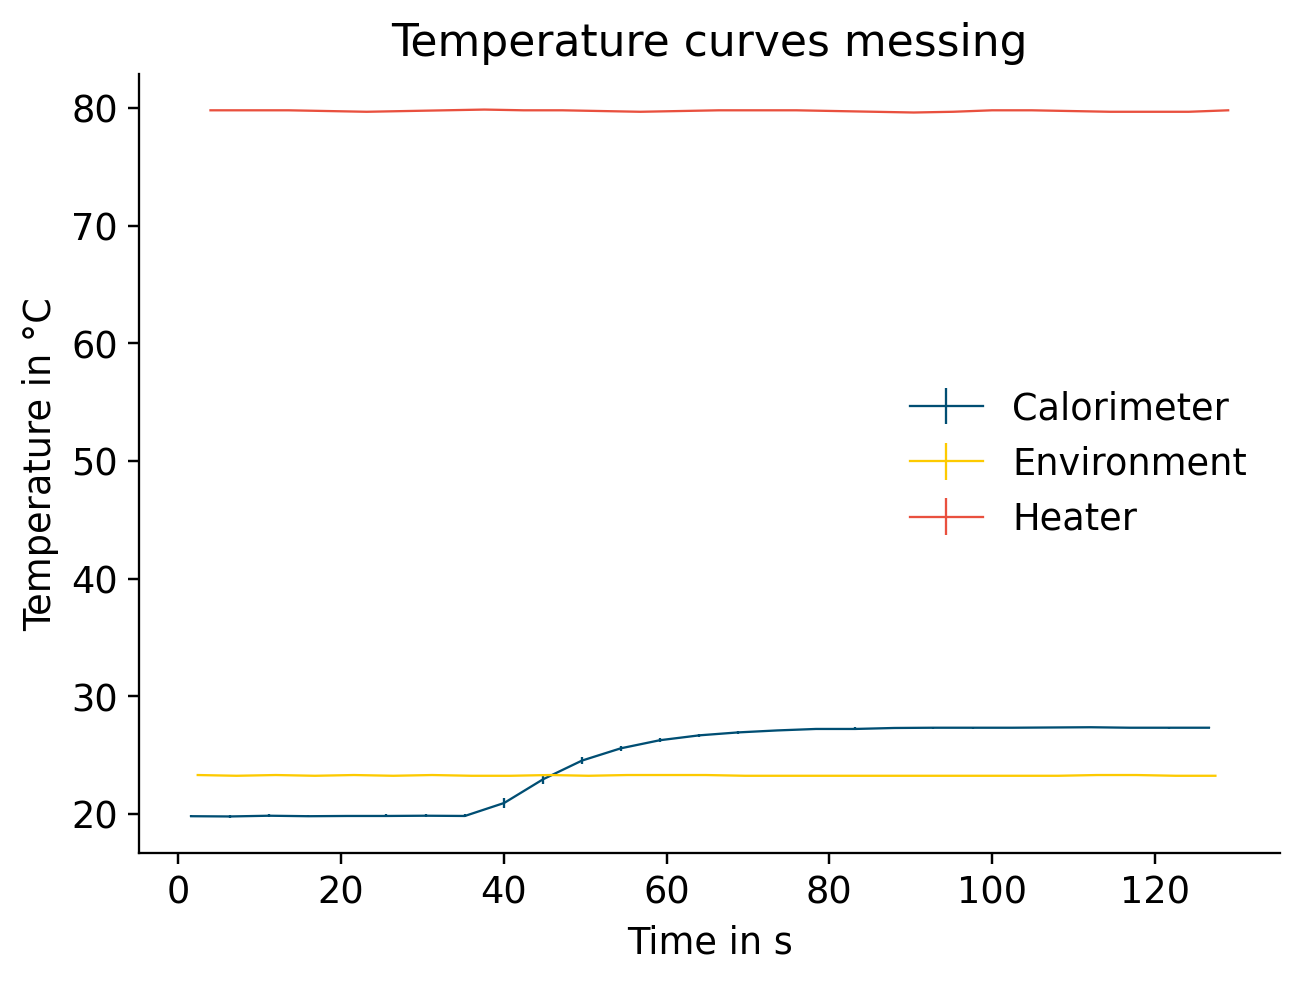

In [17]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time([mean_std_calorimeter, mean_std_environment, mean_std_heater], data_dict['time'], ['Calorimeter', 'Environment', 'Heater'], 'Time', 'Temperature')

plt.title('Temperature curves messing');

# DONE #

#### (iv) Metadaten auslesen

In [18]:
# TODO: Read mass of the sample from the metadata of the experiment.

path_to_sample_mass_messing = '/home/jovyan/work/calorimetry_laboratory/datasheets'
sample_mass = m_json.get_json_entry(path_to_sample_mass_messing, '1ee57b38-1b08-63da-8b38-63a271236a0b', ['probe', 'mass', 'value'])
print(sample_mass)

# DONE #

680


#### (v) Anfangs- und Endwert der Temperatur
Die Mischungstemperatur und Anfangstemperatur des Kalorimeters sind für die Berechnung relevant.

In [19]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data_dict['temperature'][0:2]) 
print(temperature_mix, temperature_start_water)

# DONE #

27.260416666666668 19.7578125


In [20]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 temperature-values after the start of the measurement.

temperature_start_sample = np.mean(data_dict['temperature'][4][0:10])
#print(temperature_start_sample)

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen
$$
c_p = \frac{C(T_M-T_1)}{m_p(T_2-T_M)}
$$

In [21]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/(sample_mass*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [22]:
sample_heat_capa

0.39997179308908665

### spezifische Wärmekapazität: zweite Probe


#### (i) Messdaten einlesen

In [23]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob2 = '/home/jovyan/work/calorimetry_laboratory/data/spez_wk_alu/spez_wk_alu.h5'

# DONE #

In [24]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob2,"RawData")
#print(data_dict)

# DONE #

In [25]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0, 1, 2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [26]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation([data_dict['temperature'][index_calorimeter[0]], data_dict['temperature'][index_calorimeter[1]], data_dict['temperature'][index_calorimeter[2]]])
mean_std_environment = utility.cal_mean_and_standard_deviation([data_dict['temperature'][index_env[0]]])
mean_std_heater = utility.cal_mean_and_standard_deviation([data_dict['temperature'][index_bath[0]]])

# DONE #

#### (iii) Daten ploten

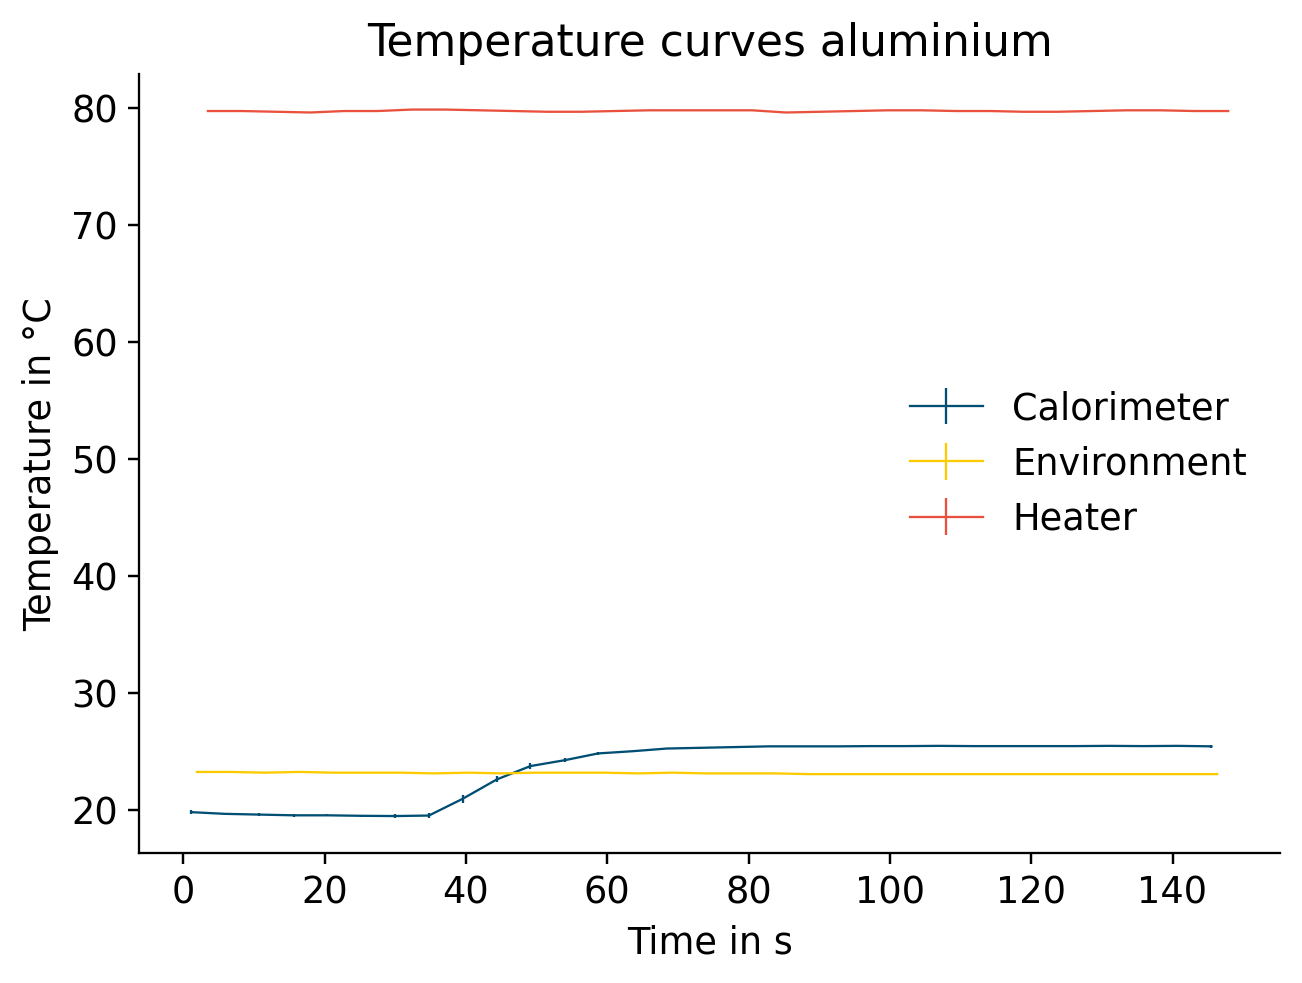

In [27]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time([mean_std_calorimeter, mean_std_environment, mean_std_heater], data_dict['time'], ['Calorimeter', 'Environment', 'Heater'], 'Time', 'Temperature')

plt.title('Temperature curves aluminium');

# DONE #

#### (iv) Metadaten auslesen

In [28]:
# TODO: Read mass of the sample from the metadata of the experiment.

path_to_sample_mass_alu = '/home/jovyan/work/calorimetry_laboratory/datasheets'
sample_mass = m_json.get_json_entry(path_to_sample_mass_alu, '1ee57b3c-b98a-64f2-aea5-ac942cc2bc1b', ['probe', 'mass', 'value'])
print(sample_mass)

# DONE #

226


#### (v) Anfangs- und Endwert der Temperatur

In [29]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data_dict['temperature'][0:2])
print(temperature_mix, temperature_start_water)

# DONE #

25.400390625 19.375


In [30]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(data_dict['temperature'][4][0:10])
#print(temperature_start_sample)

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen

In [31]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/(sample_mass*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [32]:
sample_heat_capa

0.9339888044277191

### spezifische Wärmekapazität: dritte Probe


#### (i) Messdaten einlesen

In [33]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob3 = '/home/jovyan/work/calorimetry_laboratory/data/spez_wk_pa66/spez_wk_pa66.h5'

# DONE #

In [34]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob3,"RawData")
#print(data_dict)

# DONE #

In [35]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0, 1, 2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [36]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation([data_dict['temperature'][index_calorimeter[0]], data_dict['temperature'][index_calorimeter[1]], data_dict['temperature'][index_calorimeter[2]]])
mean_std_environment = utility.cal_mean_and_standard_deviation([data_dict['temperature'][index_env[0]]])
mean_std_heater = utility.cal_mean_and_standard_deviation([data_dict['temperature'][index_bath[0]]])

# DONE #

#### (iii) Daten ploten

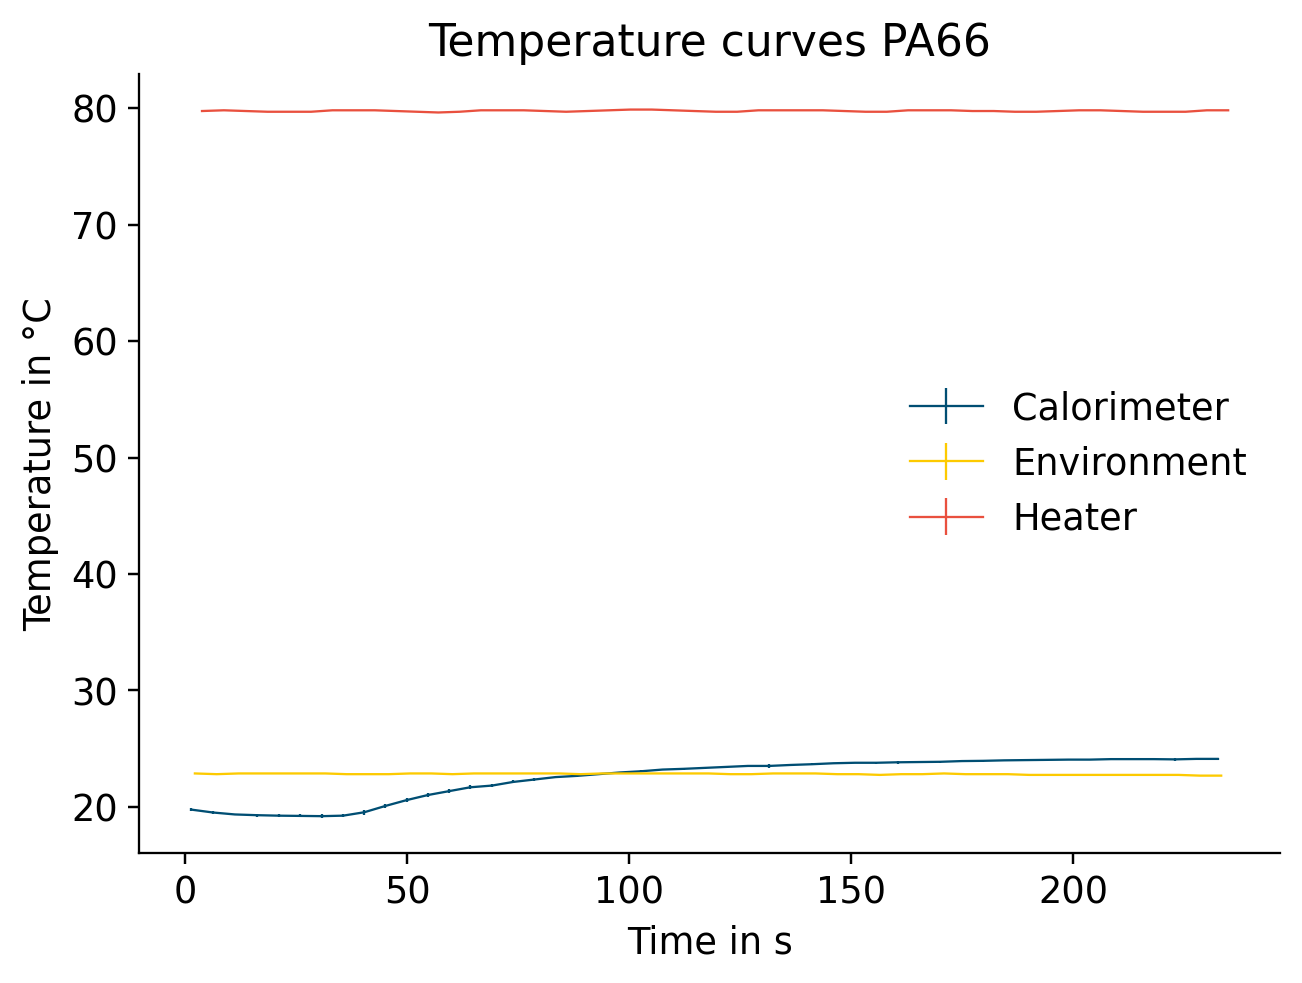

In [37]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time([mean_std_calorimeter, mean_std_environment, mean_std_heater], data_dict['time'], ['Calorimeter', 'Environment', 'Heater'], 'Time', 'Temperature')

plt.title('Temperature curves PA66');

# DONE #

#### (iv) Metadaten auslesen

In [38]:
# TODO: Read mass of the sample from the metadata of the experiment.

path_to_sample_mass_pdc = '/home/jovyan/work/calorimetry_laboratory/datasheets'
sample_mass = m_json.get_json_entry(path_to_sample_mass_pdc, '1ee7d44b-f497-6207-b38a-46bf9417809f', ['probe', 'mass', 'value'])
print(sample_mass)

# DONE #

93


#### (v) Anfangs- und Endwert der Temperatur

In [39]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data_dict['temperature'][0:2]) 

# DONE #

In [40]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(data_dict['temperature'][4][0:10])
#print(temperature_start_sample)

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen

In [41]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/(sample_mass*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [42]:
sample_heat_capa

1.7807431331271255

## Diskussion
Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage. Wie wirkt sich die mit der Probe aus dem Heißwasserbad transportierte Wassermenge auf das Ergebnis aus? Welche weiteren Fehlerquellen gibt es?

Die Ergebnisse dieses Experiments waren zum einen die Kaloriemeterkonstante C = 1904.41, zum anderen die spezifischen Wärmekapazitäten der einzelnen Materialien, für Messing: 0.39997 kJ/kgK, für Aluminium: 0.93399 kJ/kgK und für PA66 (Kunststoff): 1.78074 kJ/kgK. Anhand dieser Daten ist zu erkennen, dass PA66 die höchste spezifische Wärmekapazität besitzt, gefolgt von Aluminium und Messing mit der geringsten. Der Unterschied zwischen den Proben ist zwischen den Metallen nicht sehr stark, aber der Kunststoff weißt einen relativ hohen Wert auf, was aber erwartbar war, da man mehr Energie benötigt,um Kunststoff auf eine höhere Temperatur zu erhöhen, als Metalle, da diese gut Wärme aufnehmen können. Im Vergleich zu den Werten aus der Literatur, Messing: 0,377 kJ/kgK, Aluminium: 0,896 kJ/kgK, PA66: 1,70 kJ/kgK, sind die gemessenen Werte sehr ähnlich, Abweichungen können aufgrund von Messungenauigkeiten aufgetreten sein. Die mit der Probe aus dem Heißwasserbad transportierte Wassermenge haben wir während des Versuchs versucht so gering wie möglich zu halten, da diese die Temperatur des Wassers im Kaloriemeter erhöht und dadurch die spezifische Wärmekapazität der Probe verfälscht. Es könnte zudem sein, dass die Probe während des Abtropfprozesses zu lange der Umgebungstemperatur ausgesetzt war, wodurch die Probe möglicherweise an Temperatur verloren haben könnte, was wiederrum die spezifische Wärmekapazität der Probe verändern würde. 

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Alles in allem hat mir der Versuch sehr gefallen, da ich mit meinem Team zusammen den Versuch durchführen konnte und jeder einen Teil übernommen hat und sich in der Diskussion beteiligt hat, wodurch wir den Versuch schnell durchführen konnten. Zudem war es gut zu sehen, wie man spezifische Wärmekapazitäten experimentell bestimmen kann, da dies vorher nur ein Wert in einer Rechnung war und man nun das Verständnis erlangen konnte, wie dieser Wert zustande kommt. Aus diesem Versuch konnte ich auch lernen, dass es manchmal gut ist, immer alle Ausgaben zu kontrollieren, da wir vergessen hatten das Setup zu wechseln, somit einen Temperatursensor zu wenig gemessen haben und deshalb einen Großteil des Experiments nochmal machen mussten, was sehr zeitaufwändig war.